# Part 4: Build a multiple linear regression model

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*Activities:*

**Part 1:** EDA & Checking Model Assumptions

**Part 2:** Model Building and evaluation

**Part 3:** Interpreting Model Results

In [37]:
# import library

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [38]:
df = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv", index_col = 0) 

In [39]:
df_taxi = df.copy()

In [40]:
df_taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


<h3>EDA</h3>

- Outliers

- missing data

- check multicollinearity

- create feature variables for prediction

In [41]:
# duplicates and missing data

df_taxi.drop_duplicates()

df_taxi.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [42]:
# duration- feature vari

df_taxi['tpep_pickup_datetime'] = pd.to_datetime(df_taxi['tpep_pickup_datetime'])
df_taxi['tpep_dropoff_datetime'] = pd.to_datetime(df_taxi['tpep_dropoff_datetime'])

df_taxi['trip_duration'] = (df_taxi['tpep_dropoff_datetime'] - df_taxi['tpep_pickup_datetime'])/np.timedelta64(1,'m')

df_taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


**Box plot-** 

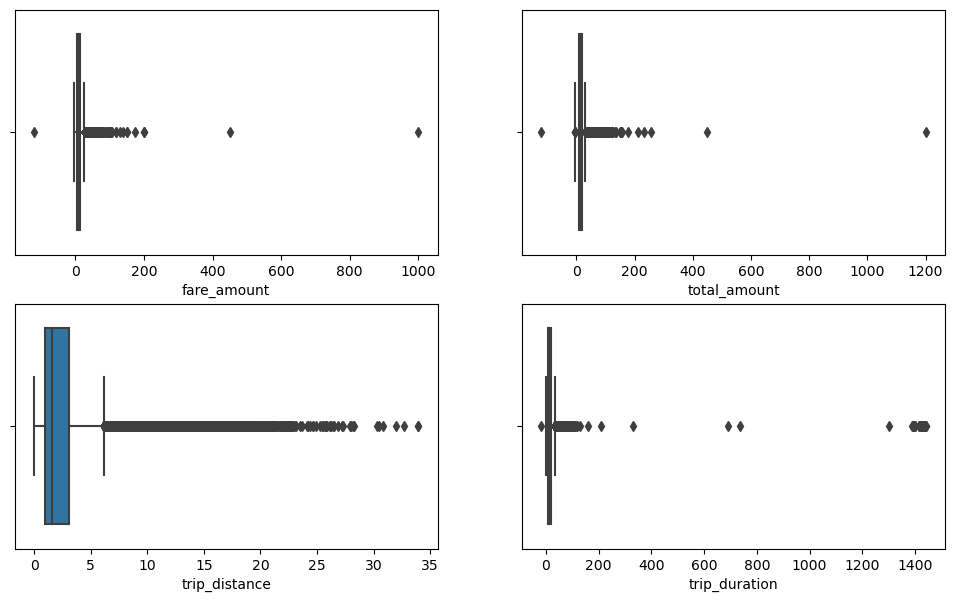

In [43]:
#find outliers for all important vari- fare_amount, total_amount, trip_duration, trip_distance

fig, axn = plt.subplots(2, 2, figsize=(12,7))

fig1 = sns.boxplot(x = df_taxi['fare_amount'], ax=axn[0][0])
fig1 = sns.boxplot(x = df_taxi['total_amount'], ax=axn[0][1])
fig1 = sns.boxplot(x = df_taxi['trip_distance'], ax=axn[1][0])
fig1 = sns.boxplot(x = df_taxi['trip_duration'], ax=axn[1][1])
plt.show()

In [44]:
# min value for fare_amount, total_amount, trip_duration is less then 0
df_taxi.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


In [45]:
#convert less then 0 => eqaul 0

df_taxi.loc[df_taxi['fare_amount']<0, 'fare_amount'] = 0
df_taxi.loc[df_taxi['total_amount']<0, 'total_amount'] = 0
df_taxi.loc[df_taxi['trip_duration']<0, 'trip_duration'] = 0

df_taxi[['fare_amount', 'total_amount', 'trip_duration']].describe()

,fare_amount,total_amount,trip_duration
count,22699.000000,22699.000000,22699.000000
mean,13.033832,16.318419,17.014525
std,13.212462,16.069060,61.996174
min,0.000000,0.000000,0.000000
25%,6.500000,8.750000,6.650000
50%,9.500000,11.800000,11.183333
75%,14.500000,17.800000,18.383333
max,999.990000,1200.290000,1439.550000


In [46]:
# find the upper limit

def upper_limit(col, factor):
    q1 = col.quantile(0.25)
    
    q3 = col.quantile(0.75)
    irq = q3 - q1
    
    return (q3 + (irq*factor))

print("fare_amount: \n upper limit: {:.3f} \n max value: {:.3f}".format(upper_limit(df_taxi['fare_amount'], factor= 6), 
                                                                        df_taxi['fare_amount'].max()))

fare_amount: 
 upper limit: 62.500 
 max value: 999.990


**Feature extracting-** 

1. location
2. mean_distance
3. mean_duration

In [47]:
# location

df_taxi['location'] = df['PULocationID'].astype(str)+" "+ df_taxi['DOLocationID'].astype(str)
df_taxi['location'].head(3)

24870114     100 231
35634249      186 43
106203690    262 236
Name: location, dtype: object

In [48]:
# Mean_duration

group = df_taxi.groupby('location')[['trip_distance']].mean()

#convert to dict
group_dict = group.to_dict()
group_dict = group_dict['trip_distance']

#create column and map mean_distince
df_taxi['mean_distance'] = df_taxi['location']

df_taxi['mean_distance'] = df_taxi['mean_distance'].map(group_dict)

#check
df_taxi[(df['PULocationID']==100) & (df_taxi['DOLocationID']==231)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,location,mean_distance
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667
96629892,2,2017-11-14 19:22:51,2017-11-14 19:41:33,1,2.79,1,N,100,231,1,13.5,1.0,0.5,4.59,0.0,0.3,19.89,18.700000,100 231,3.521667
48945131,1,2017-06-06 23:04:59,2017-06-06 23:19:48,1,3.70,1,N,100,231,1,14.0,0.5,0.5,2.00,0.0,0.3,17.30,14.816667,100 231,3.521667
50574134,2,2017-06-15 10:05:54,2017-06-15 10:53:26,1,4.10,1,N,100,231,2,28.0,0.0,0.5,0.00,0.0,0.3,28.80,47.533333,100 231,3.521667
7282051,1,2017-02-01 12:28:41,2017-02-01 12:46:00,1,3.10,1,N,100,231,1,13.5,0.0,0.5,2.85,0.0,0.3,17.15,17.316667,100 231,3.521667
49385419,1,2017-06-09 12:50:16,2017-06-09 13:14:55,1,4.10,1,N,100,231,2,19.0,0.0,0.5,0.00,0.0,0.3,19.80,24.650000,100 231,3.521667


In [49]:
#mean_duration

group = df_taxi.groupby('location').mean()[['trip_duration']]

group_dict = group.to_dict()

group_dict = group_dict['trip_duration']

df_taxi['mean_duration'] = df_taxi['location']

df_taxi['mean_duration'] = df_taxi['mean_duration'].map(group_dict)

df_taxi[(df['PULocationID']==100) & (df_taxi['DOLocationID']==231)]

C:\Users\AIMAN\AppData\Local\Temp\ipykernel_25596\4097450127.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = df_taxi.groupby('location').mean()[['trip_duration']]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,location,mean_distance,mean_duration
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,...,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222
96629892,2,2017-11-14 19:22:51,2017-11-14 19:41:33,1,2.79,1,N,100,231,1,...,1.0,0.5,4.59,0.0,0.3,19.89,18.700000,100 231,3.521667,22.847222
48945131,1,2017-06-06 23:04:59,2017-06-06 23:19:48,1,3.70,1,N,100,231,1,...,0.5,0.5,2.00,0.0,0.3,17.30,14.816667,100 231,3.521667,22.847222
50574134,2,2017-06-15 10:05:54,2017-06-15 10:53:26,1,4.10,1,N,100,231,2,...,0.0,0.5,0.00,0.0,0.3,28.80,47.533333,100 231,3.521667,22.847222
7282051,1,2017-02-01 12:28:41,2017-02-01 12:46:00,1,3.10,1,N,100,231,1,...,0.0,0.5,2.85,0.0,0.3,17.15,17.316667,100 231,3.521667,22.847222
49385419,1,2017-06-09 12:50:16,2017-06-09 13:14:55,1,4.10,1,N,100,231,2,...,0.0,0.5,0.00,0.0,0.3,19.80,24.650000,100 231,3.521667,22.847222


**Create date**

In [50]:
df_taxi['day'] = df_taxi['tpep_pickup_datetime'].dt.day_name()
df_taxi['month'] = df_taxi['tpep_pickup_datetime'].dt.month_name()
df_taxi['hour'] = df_taxi['tpep_pickup_datetime'].dt.hour

df_taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,trip_duration,location,mean_distance,mean_duration,day,month,hour
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,March,8
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,April,14
106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,December,7
38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May,13
30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,April,23


In [51]:
# rush_hours - not weekends-- 3 to 6 & 11, 14 to 18, 21 to 23 ( refer Part2)

# Create 'rush_hour' col
df_taxi['rush_hour'] = df_taxi['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df_taxi.loc[df_taxi['day'].isin(['Saturday', 'Sunday']), 'rush_hour'] = 0

In [52]:
def rush_hourizer(hour):
    if 3 <= hour['rush_hour'] < 6:
        val = 1
    elif 14 <= hour['rush_hour'] < 18:
        val = 1
    elif 21 <= hour['rush_hour'] < 23:
        val = 1
    else:
        val = 0
    return val

In [53]:
df_taxi['rush_hour'] = df_taxi.apply(rush_hourizer, axis=1)
df_taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,trip_duration,location,mean_distance,mean_duration,day,month,hour,rush_hour
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,...,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,March,8,0
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,...,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,April,14,1
106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,...,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,December,7,0
38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,...,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May,13,0
30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,...,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,April,23,0


<h3>Model Building and evaluation</h3>

In [54]:
df2 = df_taxi.copy()

df2 = df2.drop(['VendorID','tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'mean_duration',
               'location', 'day', 'month', 'hour'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  22699 non-null  int64  
 1   fare_amount      22699 non-null  float64
 2   trip_duration    22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.0 MB


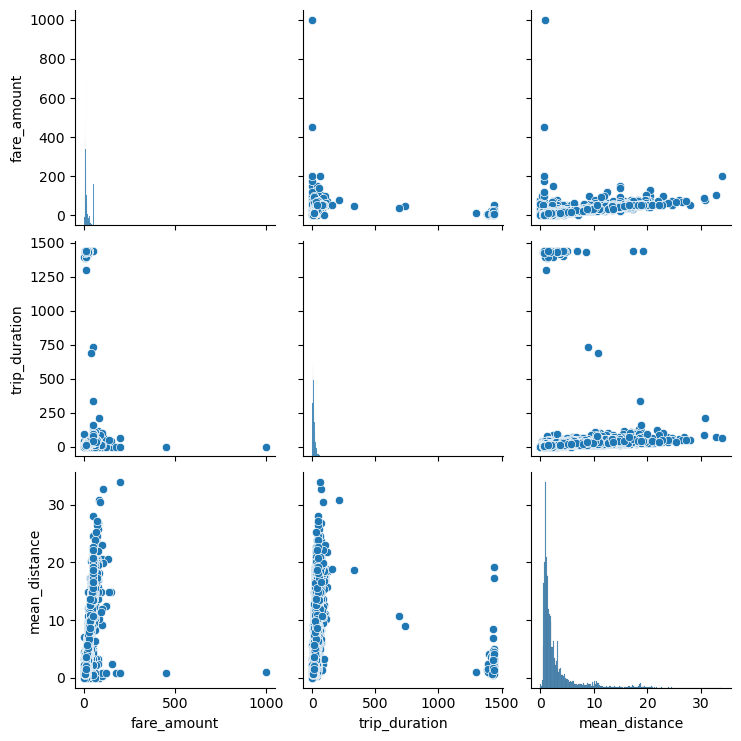

In [55]:
sns.pairplot(df2[['fare_amount', 'trip_duration', 'mean_distance']])

In [56]:
df2.corr()

,passenger_count,fare_amount,trip_duration,mean_distance,rush_hour
passenger_count,1.000000,0.010455,0.016832,0.013428,-0.003966
fare_amount,0.010455,1.000000,0.137589,0.741845,0.030693
trip_duration,0.016832,0.137589,1.000000,0.150296,0.005393
mean_distance,0.013428,0.741845,0.150296,1.000000,0.021897
rush_hour,-0.003966,0.030693,0.005393,0.021897,1.000000


<Axes: >

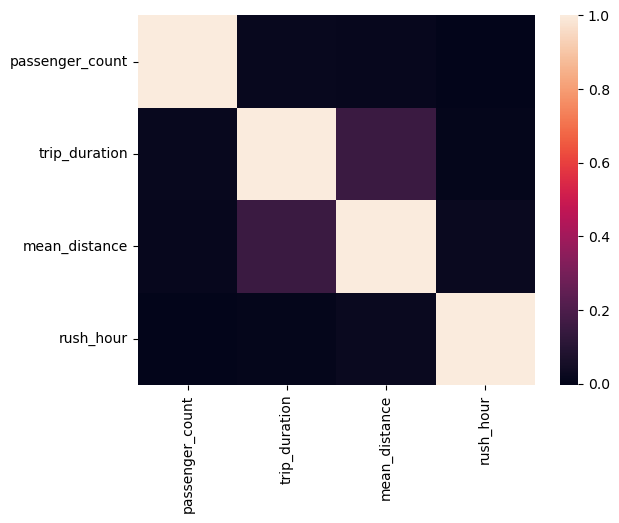

In [57]:
X= df2[['passenger_count', 'trip_duration', 'mean_distance','rush_hour']]
sns.heatmap(X.corr())

# passenger_count and rush_hours are completed unrelated- 

<Axes: >

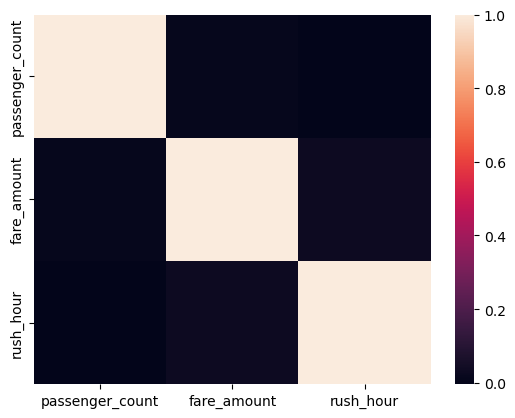

In [58]:
X= df2[['passenger_count', 'fare_amount','rush_hour']]
sns.heatmap(X.corr())

# passenger_count and rush_hours are completed unrelated- with fare_amount as well

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df2[['trip_duration', 'mean_distance']], df2['fare_amount'], 
                                                    test_size = 0.25, random_state = 42)

In [60]:
# standardise the data

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# linear regression
lr = LinearRegression()
model = lr.fit(X_train_scaled, y_train)

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [61]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)

print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.727677592042492
R^2: 0.727677592042492
MAE: 2.597065249377448
MSE: 37.36102531513625
RMSE: 6.112366588739279


**Test Data:**

In [64]:
X_test_scaled = scaler.transform(X_test)

y_pred_test = model.predict(X_test_scaled)

#evaluate model
print('Coef of determination: ', r_sq)
print('R^2:', metrics.r2_score(y_test, y_pred_test))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Coef of determination:  0.727677592042492
R^2: 0.29729725880478564
MAE: 2.6991364667588162
MSE: 201.42211273674633
RMSE: 14.192325839577752
